In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, MCMCChains, Plots, ProgressMeter

gr()
theme(:default)
default(fmt=:png, levels=7, lw=2, msw=0.5, la=0.5)
cls = [:firebrick1, :dodgerblue]
ProgressMeter.ijulia_behavior(:clear);

# d = 3

In [3]:
d = 3
model = Model(ξ=MvNormal(d, 1.0));

In [4]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=1e4, n_burn=1e3);
c1_3d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24
  HMC(0.5, 20, Any[]):  0.9743659667302973


Acceptance Ratio = 0.9732


In [5]:
s2, a2 = mcmc(HaRAM(ϵ=0.5, L=20, γ=0.05), model; n=1e4, n_burn=1e3);
c2_3d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
  HaRAM(0.5, 20, 0.05, Any[]):  0.9352786110353605


Acceptance Ratio = 0.9352


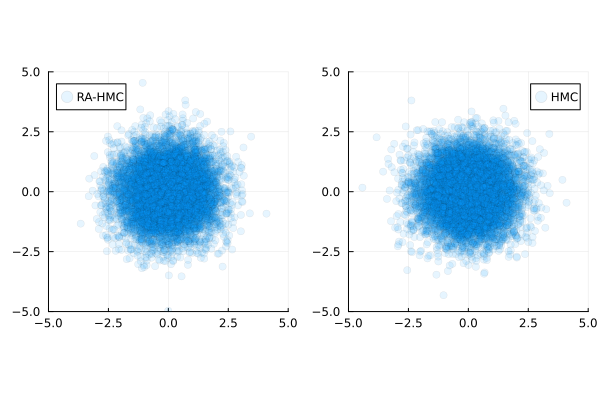

In [6]:
Ds = sample(1:d, 2, replace=false)
plot(
    scatter(s2[a2, Ds] |> m2t, ma=0.1, ratio=1, lim=(-5, 5), label="RA-HMC"),
    scatter(s1[a1, Ds] |> m2t, ma=0.1, ratio=1, lim=(-5, 5), label="HMC")
)

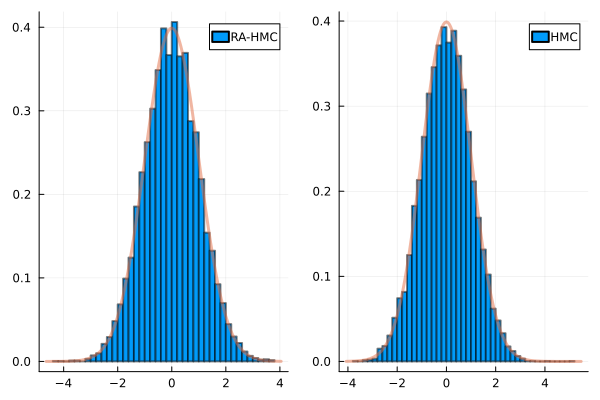

In [7]:
D = sample(1:d, 1)
plot(
    begin
        histogram(s1[a1, D] |> m2t, normalize=true, label="RA-HMC")
        plot!(x -> pdf(Normal(0, 1), x), lw=3,label="")
    end,
    begin
        histogram(s2[a2, D] |> m2t, normalize=true, label="HMC")
        plot!(x -> pdf(Normal(0, 1), x), lw=3,label="")
    end,
)

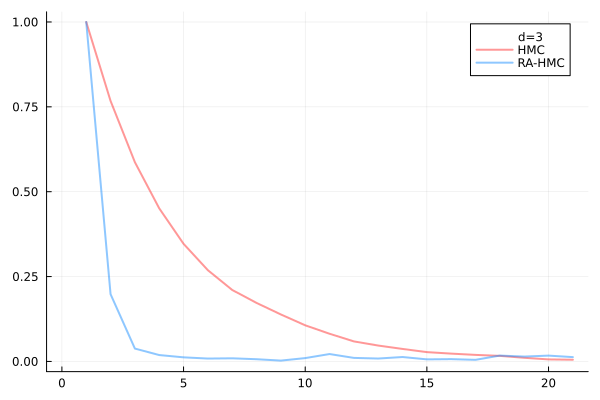

In [8]:
plt_3 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_3d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_3d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

# d = 10

In [9]:
d = 10
model = Model(ξ=MvNormal(d, 1.0));

In [10]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=1e4, n_burn=1e3);
c1_10d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
  HMC(0.5, 20, Any[]):  0.9474593218798291


Acceptance Ratio = 0.9477


In [11]:
s2, a2 = mcmc(HaRAM(ϵ=0.5, L=20, γ=0.05), model; n=1e4, n_burn=1e3);
c2_10d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
  HaRAM(0.5, 20, 0.05, Any[]):  0.8751022634305973


Acceptance Ratio = 0.8754


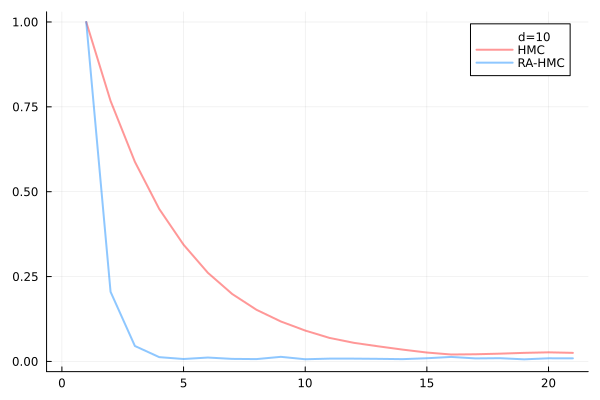

In [12]:
plt_10 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_10d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_10d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

# d = 50

In [13]:
d = 50
model = Model(ξ=MvNormal(d, 1.0));

In [14]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=1e4, n_burn=1e3);
c1_50d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
  HMC(0.5, 20, Any[]):  0.8834651395327697


Acceptance Ratio = 0.8844


In [15]:
s2, a2 = mcmc(HaRAM(ϵ=0.5, L=20, γ=0.05), model; n=1e4, n_burn=1e3);
c2_50d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
  HaRAM(0.5, 20, 0.05, Any[]):  0.7301154440505409


Acceptance Ratio = 0.7318


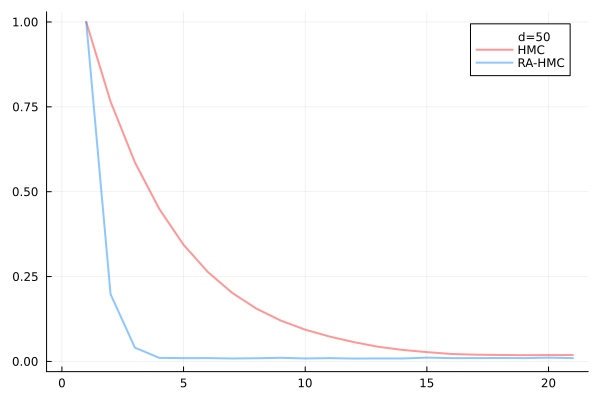

In [16]:
plt_50 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_50d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_50d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

# d = 100

In [17]:
d = 100
model = Model(ξ=MvNormal(d, 1.0));

In [18]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=1e4, n_burn=1e3);
c1_100d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14
  HMC(0.5, 20, Any[]):  0.8368330151804382


Acceptance Ratio = 0.8358


In [19]:
s2, a2 = mcmc(HaRAM(ϵ=0.5, L=20, γ=0.05), model; n=1e4, n_burn=1e3);
c2_100d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:30
  HaRAM(0.5, 20, 0.05, Any[]):  0.6321243523316062


Acceptance Ratio = 0.6322


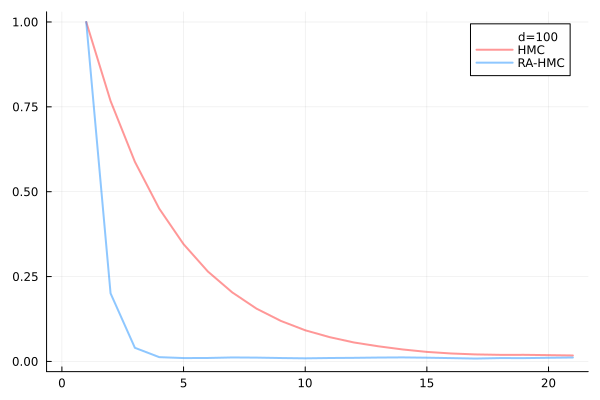

In [20]:
plt_100 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_100d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_100d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

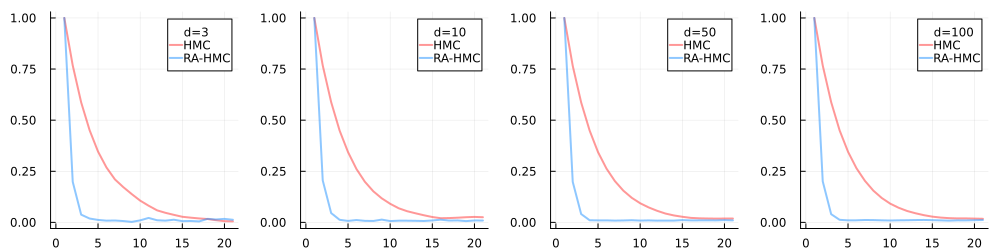

In [21]:
plt = plot(plt_3, plt_10, plt_50, plt_100, layout=(1, 4), size=(1000, 250))

In [22]:
savefig(plt, plotsdir("gaussian1/all_plots.pdf"))

"/storage/work/s/suv87/julia/haram/plots/gaussian1/all_plots.pdf"